## DATA CLEANING

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

#regex
import re

#for lemmatization of words we will use nltk library
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
lemma = WordNetLemmatizer()

In [2]:
df = pd.read_csv('BA_review.csv', index_col=0)
df.head()

,review,rating,date,location,cleaned_reviews
0,✅ Trip Verified | London to Glasgow with Brit...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,14th December 2019,United Kingdom,trip verified london glasgow british airway fl...
1,✅ Trip Verified | London to San Francisco. Thi...,1,13th December 2019,United States,trip verified london san francisco flight deli...
2,Not Verified | Heathrow to Belfast. Great ser...,9,11th December 2019,United Kingdom,verified heathrow belfast great service belfas...
3,Not Verified | London to Singapore. I was app...,1,10th December 2019,Ireland,verified london singapore apprehensive flying ...
4,✅ Trip Verified | Toulouse to London. I'm a ab...,9,8th December 2019,United Kingdom,trip verified toulouse london able bodied fit ...


In [3]:
df.dtypes

review             object
rating             object
date               object
location           object
cleaned_reviews    object
dtype: object

In [5]:
df.review

0       ✅ Trip Verified |  London to Glasgow with Brit...
1       ✅ Trip Verified | London to San Francisco. Thi...
2       Not Verified |  Heathrow to Belfast. Great ser...
3       Not Verified |  London to Singapore. I was app...
4       ✅ Trip Verified | Toulouse to London. I'm a ab...
                              ...                        
3685    Not Verified | BA is not treating its premium ...
3686    ✅ Trip Verified |  24 hours before our departu...
3687    ✅ Trip Verified |  We arrived at Heathrow at 0...
3688    ✅ Trip Verified |  Original flight was cancell...
3689    Not Verified |  Airport check in was functiona...
Name: review, Length: 3690, dtype: object

In [10]:
# remove the \t and \n from the ratings
df.rating = df.rating.str.strip("\n\t\t\t\t\t\t\t\t\t\t\t\t\t")


In [11]:
df.head()

,review,rating,date,location,cleaned_reviews
0,✅ Trip Verified | London to Glasgow with Brit...,5,14th December 2019,United Kingdom,trip verified london glasgow british airway fl...
1,✅ Trip Verified | London to San Francisco. Thi...,1,13th December 2019,United States,trip verified london san francisco flight deli...
2,Not Verified | Heathrow to Belfast. Great ser...,9,11th December 2019,United Kingdom,verified heathrow belfast great service belfas...
3,Not Verified | London to Singapore. I was app...,1,10th December 2019,Ireland,verified london singapore apprehensive flying ...
4,✅ Trip Verified | Toulouse to London. I'm a ab...,9,8th December 2019,United Kingdom,trip verified toulouse london able bodied fit ...


In [3]:
# Create a new column 'Verification_Status' to separate "Verified" and "Not Verified"
df['Verification_Status'] = df['review'].str.extract(r'(\bVerified\b|\bNot Verified\b)')

# Rename the column for clarity
df = df.rename(columns={'Verification_Status': 'Verified_Status'})

# Print the first few rows of the DataFrame to verify the changes
df.head()

,review,rating,date,location,cleaned_reviews,Verified_Status
0,✅ Trip Verified | London to Glasgow with Brit...,\n\t\t\t\t\t\t\t\t\t\t\t\t\t5,14th December 2019,United Kingdom,trip verified london glasgow british airway fl...,Verified
1,✅ Trip Verified | London to San Francisco. Thi...,1,13th December 2019,United States,trip verified london san francisco flight deli...,Verified
2,Not Verified | Heathrow to Belfast. Great ser...,9,11th December 2019,United Kingdom,verified heathrow belfast great service belfas...,Not Verified
3,Not Verified | London to Singapore. I was app...,1,10th December 2019,Ireland,verified london singapore apprehensive flying ...,Not Verified
4,✅ Trip Verified | Toulouse to London. I'm a ab...,9,8th December 2019,United Kingdom,trip verified toulouse london able bodied fit ...,Verified


In [14]:
df.Verified_Status.value_counts()

Verified        1916
Not Verified     230
Name: Verified_Status, dtype: int64

"Verified": There are 1916 reviews in this category. These reviews are associated with customers whose feedback has been verified through certain validation methods.

"Not Verified": There are 230 reviews in this category. These reviews are from customers whose feedback has not been verified through any specific validation method.

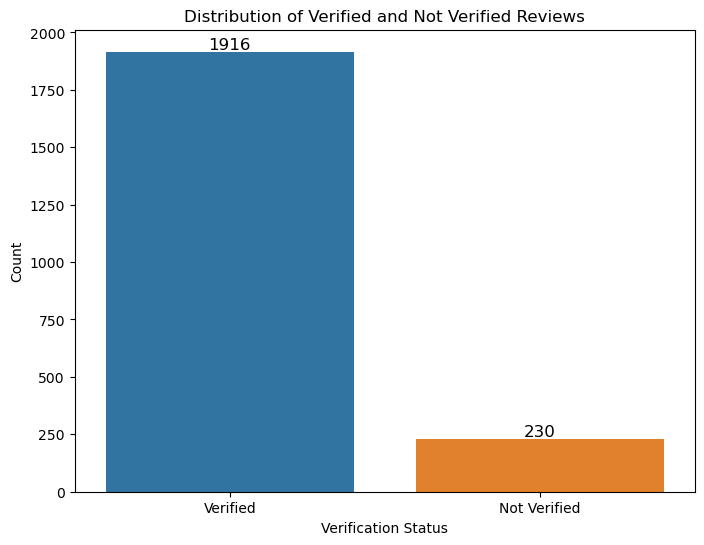

In [15]:
# Create a count plot to visualize the distribution of "Verified" and "Not Verified" reviews
plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='Verified_Status')

# Add labels to the bars
ax = plt.gca()
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', fontsize=12, color='black', xytext=(0, 5), textcoords='offset points')

# Set labels and title
plt.xlabel('Verification Status')
plt.ylabel('Count')
plt.title('Distribution of Verified and Not Verified Reviews')

# Show the plot
plt.show()

In [17]:
# convert the date to datetime format

df.date = pd.to_datetime(df.date)
df.date.head()

0   2019-12-14
1   2019-12-13
2   2019-12-11
3   2019-12-10
4   2019-12-08
Name: date, dtype: datetime64[ns]

In [19]:
#check for unique values
df.rating.unique()

array(['5', '1', '9', '8', '7', '3', '6', '10', '2', '4', 'None'],
      dtype=object)

In [20]:
df.rating.value_counts()

1       750
5       645
2       358
3       353
8       324
10      297
7       281
9       280
4       230
6       166
None      6
Name: rating, dtype: int64

In [21]:
df.isnull().value_counts()

review  rating  date   location  cleaned_reviews  Verified_Status
False   False   False  False     False            False              2146
                                                  True               1542
                       True      False            True                  2
dtype: int64

In [22]:
df.isnull().sum()

review                0
rating                0
date                  0
location              2
cleaned_reviews       0
Verified_Status    1544
dtype: int64

we have just 2 null values in location column so we would drop it

In [23]:
#drop the rows using index where the country value is null
df.drop(df[df.location.isnull() == True].index, axis=0, inplace=True)

In [24]:
df.shape

(3688, 6)

In [27]:
df.dtypes

review                     object
rating                     object
date               datetime64[ns]
location                   object
cleaned_reviews            object
Verified_Status            object
dtype: object

## Exploratory Data Analysis

In [25]:
import plotly.express as px

import datetime as dt

from wordcloud import WordCloud, STOPWORDS

## What is the average rating?

In [4]:
# Replace 'None' with NaN
df['rating'] = df['rating'].replace('None', pd.NA)

# Convert the 'rating' column to numeric
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')

In [5]:
df.rating.mean()

4.808631921824104

The calculated result, which is around 4.81, signifies that the average rating given by customers in the dataset is quite high. In other words, the customers' overall satisfaction level tends to be on the positive side. the scale ranges from 1 to 5, a rating of 4.81 implies a notably high level of satisfaction, as it approaches the maximum rating of 5. 

## TOTAL NUMBER OF REVIEWS

In [11]:
total_reviews = len(df)
print(f"Total number of reviews: {total_reviews}")

Total number of reviews: 3690


## TOTAL NUMBER OF COUNTRY

In [13]:
total_countries = df['location'].nunique()
print(f"Total number of unique countries: {total_countries}")


Total number of unique countries: 71


## What is the total counts for each ratings?

Text(0.5, 1.0, 'Distribution of Ratings')

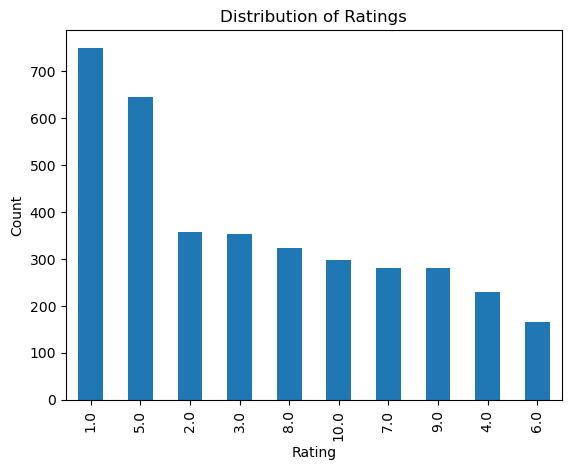

In [32]:
#Plot a bar chart of Rating counts
df['rating'].value_counts().plot(kind='bar')
plt.xlabel('Rating')
plt.ylabel('Count')
plt.title('Distribution of Ratings')

In [7]:
# Calculate the count and percentage values for each rating
df_rating = pd.DataFrame(df['rating'].value_counts()).reset_index()

In [8]:
df_rating['pct_values'] = (df_rating['rating'] / df_rating['rating'].sum() * 100).round(2)
df_rating


,index,rating,pct_values
0,1.0,750,20.36
1,5.0,645,17.51
2,2.0,358,9.72
3,3.0,353,9.58
4,8.0,324,8.79
5,10.0,297,8.06
6,7.0,281,7.63
7,9.0,280,7.60
8,4.0,230,6.24
9,6.0,166,4.51


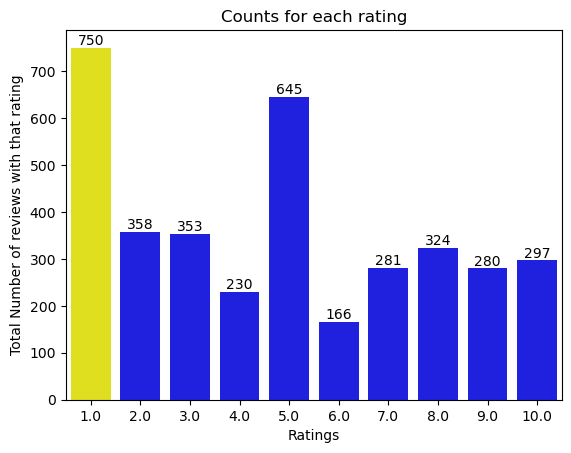

In [10]:
# Determine the color for the bars
clrs = ['yellow' if (x == df_rating['rating'].max()) else 'blue' for x in df_rating['rating']]

# Create a bar plot
ax = sns.barplot(x='index', y='rating', data=df_rating, palette=clrs, errwidth=0)

# Add labels and title
ax.set_xlabel("Ratings")
ax.set_ylabel("Total Number of reviews with that rating")
ax.set_title("Counts for each rating")

# Add labels on top of the bars
ax.bar_label(ax.containers[0])

# Show the plot
plt.show()


The "rating" column represents the different ratings given.
The "pct_values" column indicates the percentage of each rating in the dataset.
The data is presented in tabular form with each rating and its corresponding percentage value.
For example, a rating of "1.0" constitutes approximately 20.37% of the total ratings in the dataset, while a rating of "5.0" accounts for around 17.49% of the total ratings. The table provides a breakdown of the distribution of ratings in the dataset, helping to understand the distribution of customer feedback.

In [46]:
# Unique countries BA recieved the reviews from

print(f"{len(df.location.unique())} unique countries")

71 unique countries



The code provided calculates the number of unique countries from which British Airways (BA) received reviews. The result, which is 71 unique countries, indicates that BA has received feedback and reviews from customers in a total of 71 different countries. This information is helpful in understanding the geographical diversity of customers providing reviews for British Airways.

## Which country most review comes from?

In [33]:
# Count the unique values in the 'Location' column
location_counts = df['location'].value_counts()
location_counts

United Kingdom    2321
United States      406
Australia          162
Canada             119
Germany             64
                  ... 
Bahrain              1
Oman                 1
Barbados             1
Laos                 1
Jordan               1
Name: location, Length: 71, dtype: int64

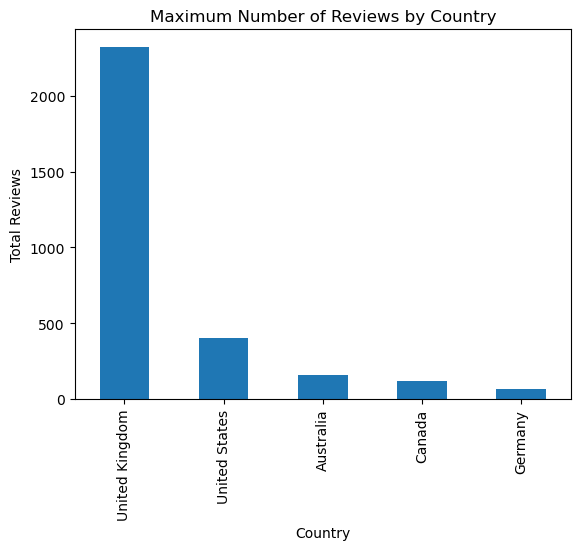

In [48]:
df_country_review = df['location'].value_counts().head(5).reset_index()
df_country_review.rename(columns={'index': 'location', 'location': 'total_reviews'}, inplace=True)
df_country_review.plot(kind='bar', x='location', legend=False)
plt.title('Maximum Number of Reviews by Country')
plt.xlabel('Country')
plt.ylabel('Total Reviews')
plt.show()


These numbers indicate the distribution of reviews across various locations, with the majority of reviews coming from the United Kingdom.






## Which country provided on average highest ratings?

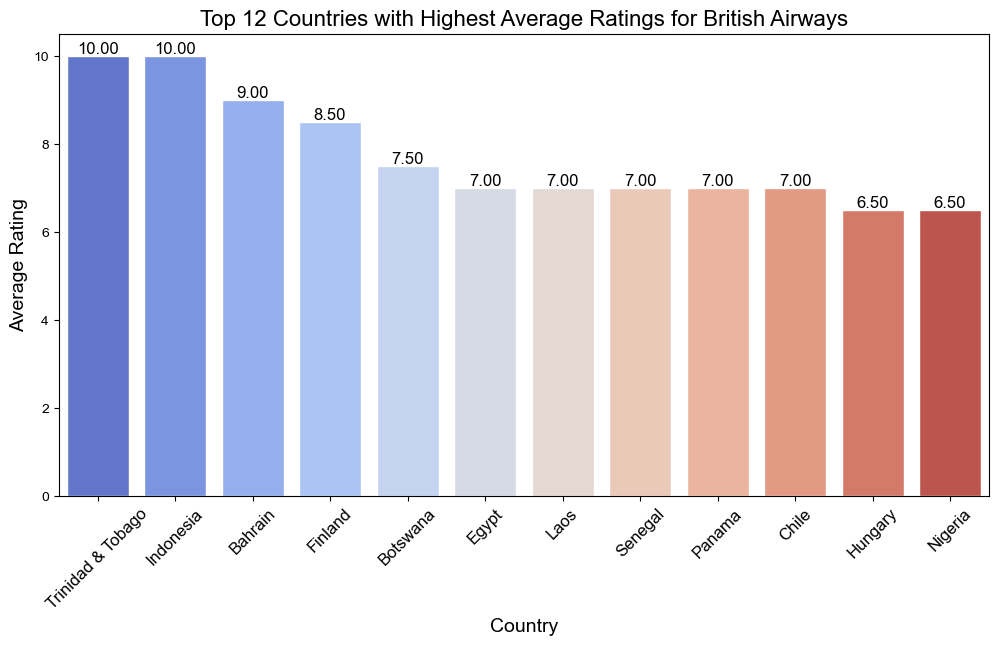

In [51]:
# Group the DataFrame by 'country', calculate the mean of 'stars' for each country,
# sort them in descending order, and select the top 12 countries.
df_country_rating = df.groupby('location').mean()['rating'].sort_values(ascending=False)[:12].reset_index()

# Rename the 'stars' column to 'avg_rating' for clarity.
df_country_rating.rename(columns={'rating': 'avg_rating'}, inplace=True)

# Create a figure and axis for the plot with a larger size, customized font, and colors.
fig, ax = plt.subplots(figsize=(12, 6))
sns.set_style("whitegrid")
colors = sns.color_palette("coolwarm", len(df_country_rating))

# Create a bar plot using Seaborn, specifying the data, colors, and the axis to use.
sns.barplot(x='location', y='avg_rating', data=df_country_rating, ax=ax, palette=colors)

# Annotate the bars with the average rating values using customized font and size.
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 5),
                textcoords='offset points')

# Set the title and labels for the plot with custom font and size.
ax.set_title("Top 12 Countries with Highest Average Ratings for British Airways", fontsize=16)
plt.xlabel("Country", fontsize=14)
plt.ylabel("Average Rating", fontsize=14)
plt.xticks(rotation=45, fontsize=12)

# Show the plot.
plt.show()




Trinidad and Tobago
Indonesia
Bahrain
Finland
Botswana
These countries have the most satisfied customers, as indicated by their high average ratings. This information can be valuable for understanding regional variations in customer experiences and identifying areas where British Airways is performing exceptionally well.

## Time Series Analysis

In [53]:
# Assuming you have a DataFrame with a 'date' column
# Convert the 'date' column to a datetime type if it's not already
df['date'] = pd.to_datetime(df['date'])

# Define the time range for analysis (e.g., the most recent month)
recent_start_date = pd.to_datetime('2023-10-01')
recent_end_date = pd.to_datetime('2023-10-31')

# Filter the data for the specified time range
recent_data = df[(df['date'] >= recent_start_date) & (df['date'] <= recent_end_date)]

# Create a line plot using Plotly Express for the recent data
fig = px.line(recent_data, x='date', y='rating')

# Add a range slider to the x-axis for interactive zooming
fig.update_xaxes(rangeslider_visible=True)

# Show the plot
fig.show()

Text(0.5, 1.0, 'Word Cloud of Cleaned Reviews')

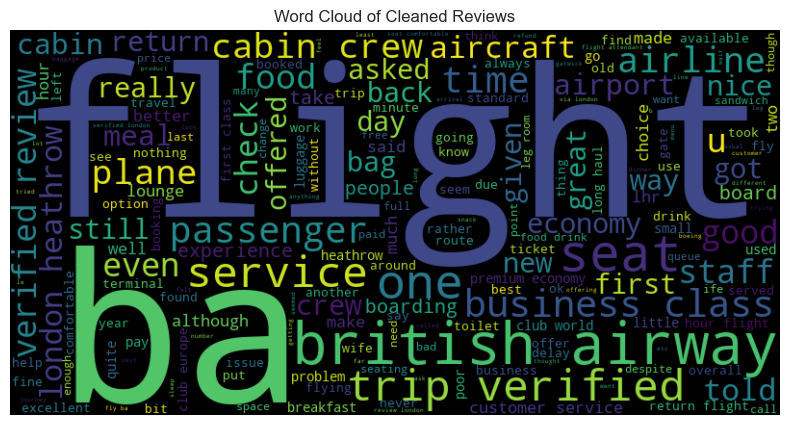

In [56]:
# Create a word cloud for the 'cleaned_reviews' column
from wordcloud import WordCloud
wordcloud = WordCloud(width=800, height=400).generate(' '.join(df['cleaned_reviews']))
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title('Word Cloud of Cleaned Reviews')

Many words in the text don't provide a clear indication of whether the review is positive or negative. Words like "passenger" and "flight" are examples of such words that don't contribute to a conclusive sentiment. Therefore, we can add them to the list of stopwords to exclude them from sentiment analysis.

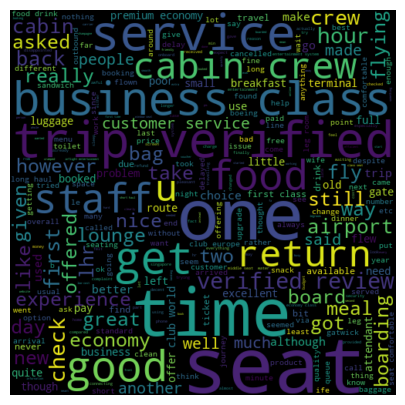

In [57]:
# Combine all text from the 'corpus' column
reviews = " ".join(df['cleaned_reviews'])

# Set stopwords
stopwords_set = set(stopwords.words('english'))
stopwords_set.update(["ba", "flight", "british", "airway", "airline", "plane", "told", "also", "passenger",
                      "london", "heathrow", "aircraft", "could", "even", "would"])

# Create and generate a word cloud image
wordcloud = WordCloud(height=500, width=500, max_font_size=100, max_words=300, stopwords=stopwords_set).generate(reviews)

# Display the generated image
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

## WORD FREQUENCY

In [58]:
from sklearn.feature_extraction import text
from nltk.probability import FreqDist


# Split the text of all reviews into a list of words
words = reviews.split(" ")

# Remove certain words that will not be used to determine the positive or negative sentiment
stopwords = text.ENGLISH_STOP_WORDS.union(['flight', 'ba', "passenger", "u", "london", "airway", "british",
                                           "airline", "heathrow", "plane", "lhr", "review"])

new_words = [word for word in words if word not in stopwords]

# Calculate the frequency distribution of words and get the most common 20 words
nlp_words = FreqDist(new_words).most_common(20)

# Create a DataFrame of these words and their frequencies
df_word_frequencies = pd.DataFrame(nlp_words, columns=['Word', 'Frequency'])

# Display the DataFrame
print(df_word_frequencies)

        Word  Frequency
0       seat       4523
1    service       2958
2       time       2426
3       food       2352
4       crew       2208
5   verified       2152
6       good       2061
7      cabin       2038
8      class       1900
9       hour       1875
10      trip       1688
11     staff       1576
12  business       1570
13   economy       1452
14     check       1295
15     drink       1206
16      meal       1169
17    return       1099
18      club       1096
19    lounge       1087


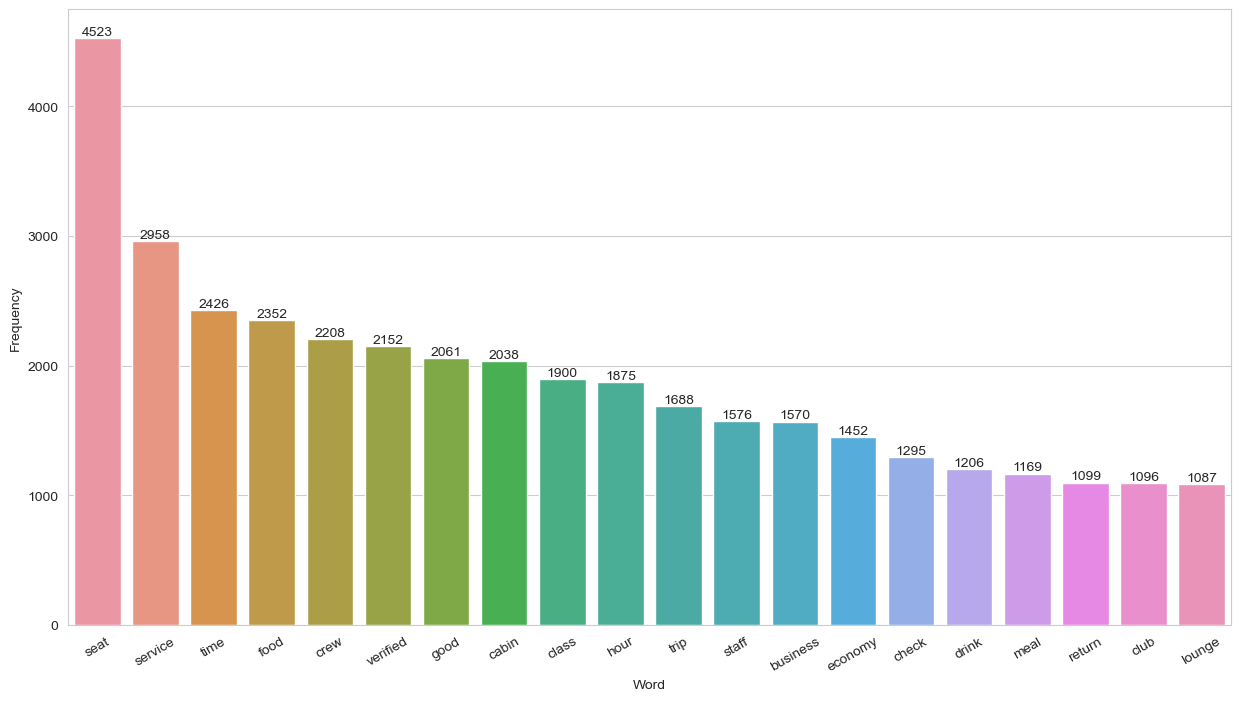

In [59]:
# Set the figure and axis variables
fig, ax = plt.subplots(figsize=(15, 8))

# Create a bar plot using Seaborn with 'Word' on the x-axis and 'Frequency' on the y-axis
all_plot = sns.barplot(x='Word', y='Frequency', data=df_word_frequencies, ax=ax)

# Add labels to the bars
all_plot.bar_label(all_plot.containers[0])

# Rotate the x-axis labels for ease of viewing
plt.xticks(rotation=30)

# Show the plot
plt.show()



This provides us with insight into the key topics customers are discussing. It's evident that "Crew " is the most frequently mentioned aspect of the airline, followed by "Seat", "service" and "time" all of which are crucial factors for customers when evaluating the service. However, what we don't know yet is the sentiment associated with each of these aspects. To gain a deeper understanding, we will utilize n-gram plots to assess whether customers are expressing positive or negative sentiments about these aspects.

## Word Frequency with N-gram

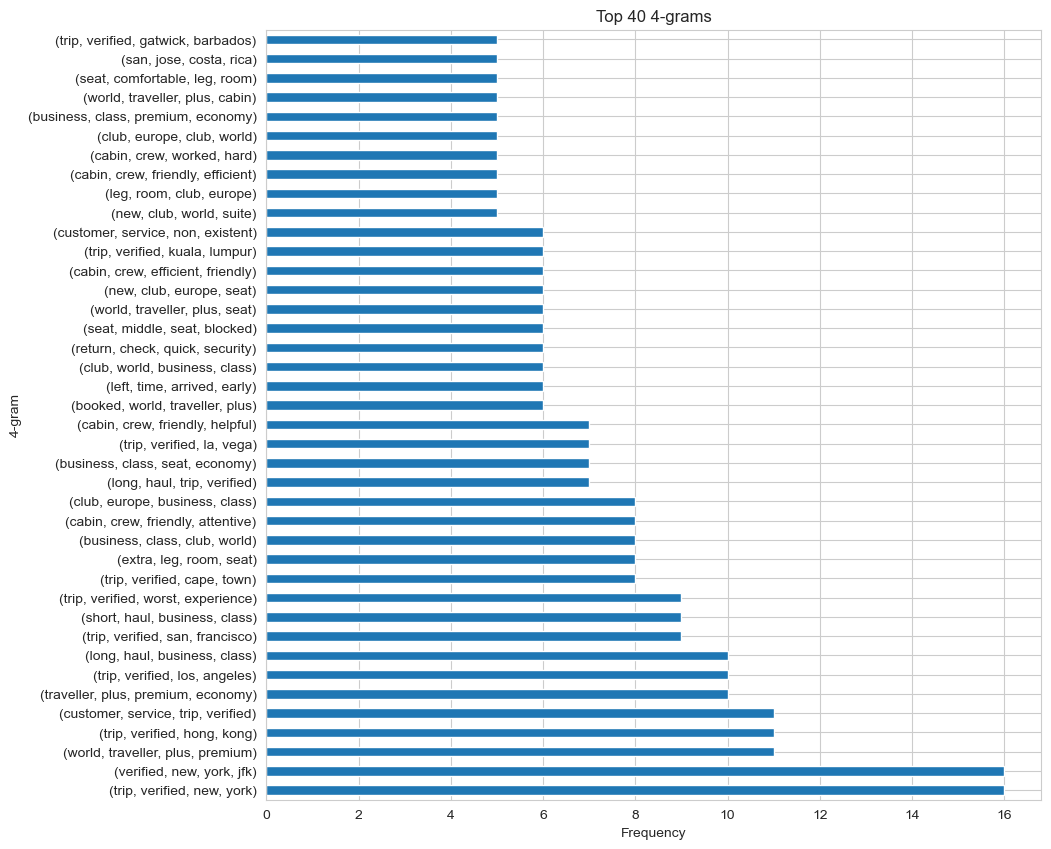

In [60]:
from nltk import ngrams




def get_freq_dist(text, ngram_length, ngram_type='bigram', top_n=40):
    # Tokenize the text into words
    words = text.split(" ")

    # Filter out stopwords
    filtered_words = [word for word in words if word not in stopwords]

    # Generate n-grams
    if ngram_type == 'bigram':
        ngrams_list = list(ngrams(filtered_words, ngram_length))
    else:
        # For other n-grams like trigrams, adjust 'ngram_length' and use ngrams() accordingly
        ngrams_list = list(ngrams(filtered_words, ngram_length))

    # Create a frequency distribution
    ngram_fd = FreqDist(ngrams_list)

    # Get the top 'top_n' most common n-grams
    most_common_ngrams = ngram_fd.most_common(top_n)

    # Convert to a Pandas Series for easy plotting
    ngram_freqdist = pd.Series(dict(most_common_ngrams))

    # Plot the n-grams
    plt.figure(figsize=(10, 10))
    ax = ngram_freqdist.plot(kind="barh")
    plt.xlabel('Frequency')
    plt.ylabel(f'{ngram_length}-gram')
    plt.title(f'Top {top_n} {ngram_length}-grams')
    plt.show()

# Call the function with your data
get_freq_dist(reviews, 4)  # For bigrams


We've observed that several positive terms are frequently mentioned when it comes to the cabin crew. Phrases like "cabin_crew_friendly_efficient," "seat_comfortable_leg_room," and "cabin_crew_friendly_attentive" appear regularly in the reviews. This indicates that customers are consistently praising the cabin crew of British Airways for their friendly and efficient service.

To gain deeper insights, we can employ a different approach. We'll categorize the reviews based on their ratings. Specifically, we'll consider ratings 1-3 as negative reviews, 4-6 as average or good experiences, and 7-10 as exceptional experiences. This segmentation will allow us to analyze the word frequencies associated with each rating category and gain a more comprehensive understanding of customer feedback.

In [62]:
rating_1_3 = df[df.rating.isin([1,2,3])]
rating_4_6 = df[df.rating.isin([4,5,6])]
rating_7_10 = df[df.rating.isin([7,8,9,10])]

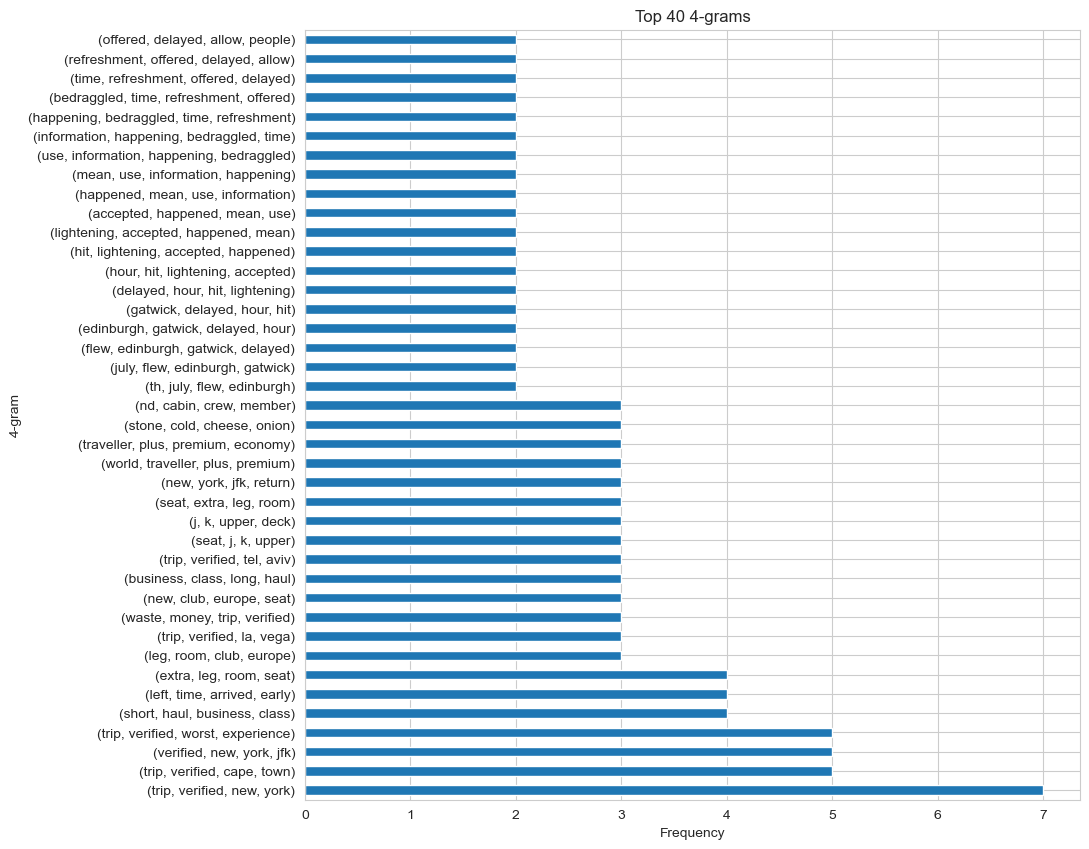

In [67]:
# Concatenate the reviews for each rating range into separate text strings
review_1_3 = " ".join(rating_1_3.cleaned_reviews)
review_4_6 = " ".join(rating_4_6.cleaned_reviews)
review_7_10 = " ".join(rating_7_10.cleaned_reviews)

# Call the get_freq_dist function to analyze n-grams for the 7-10 rating range
get_freq_dist(review_7_10, 4)


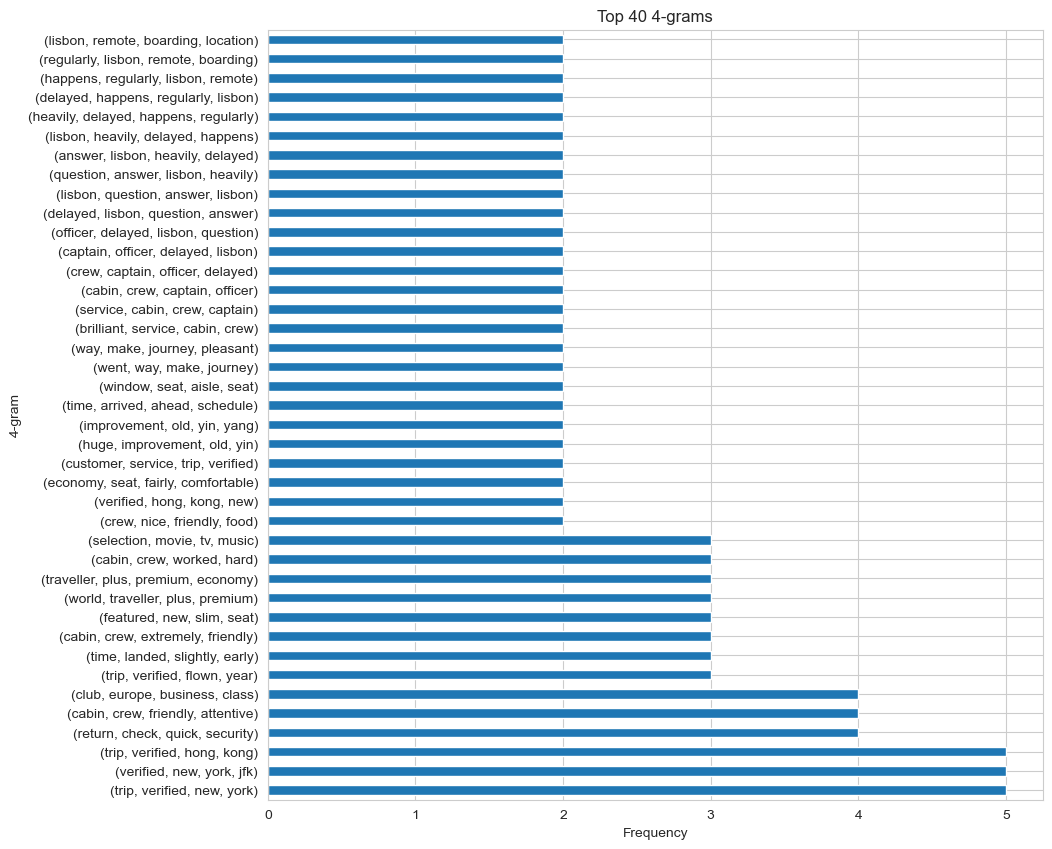

In [69]:
new_words = " ".join([word for word in words_4_6 if word not in stopwords])

get_freq_dist(new_words, 4)


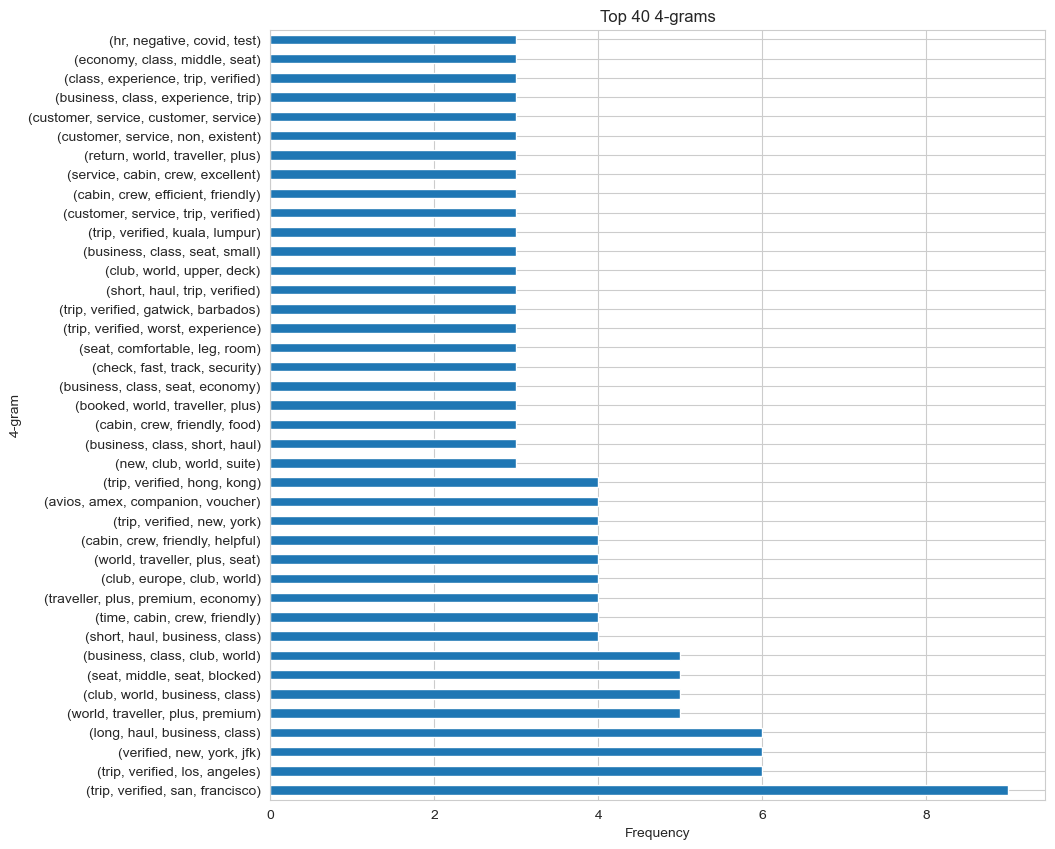

In [71]:
new_words = " ".join([word for word in words_1_3 if word not in stopwords])

get_freq_dist(new_words, 4)

# Now we will use textblob library to define if the text is negative or positive and to what extent

In [72]:
from textblob import TextBlob



# Create empty lists to store polarity and subjectivity values
polarity_values = []
subjectivity_values = []

# Iterate through the 'corpus' column and calculate polarity and subjectivity
for text in df['cleaned_reviews']:
    sent = TextBlob(text)
    polarity = sent.sentiment.polarity
    subjectivity = sent.sentiment.subjectivity
    polarity_values.append(polarity)
    subjectivity_values.append(subjectivity)

# Add the calculated polarity and subjectivity values to the DataFrame
df['polarity'] = polarity_values
df['subjectivity'] = subjectivity_values


In [73]:
# Count the number of reviews with polarity between -0.2 and 0.2
count_between_minus_0_2_and_0_2 = df[(df['polarity'] > -0.2) & (df['polarity'] < 0.2)].shape[0]
print(f"{count_between_minus_0_2_and_0_2} number of reviews between -0.2 and 0.2 polarity score")

# Count the number of reviews with polarity between -0.1 and 0.1
count_between_minus_0_1_and_0_1 = df[(df['polarity'] > -0.1) & (df['polarity'] < 0.1)].shape[0]
print(f"{count_between_minus_0_1_and_0_1} number of reviews between -0.1 and 0.1 polarity score")

2484 number of reviews between -0.2 and 0.2 polarity score
1437 number of reviews between -0.1 and 0.1 polarity score


Polarity score is given between -1 to 1 and more close the value to -1, it indicates negative review and vice versa is true for positive value. If we consider a threshold where any review with polarity greater than 0.2 is positive and less than -0.2 is negative, we are left with 2286 reviews that lies in the neutral zone. To further narrow down this number of neutral reviews, let's take the threshold of 0.1.
We will try another method of labelling the reveiws as positives or negatives

In [74]:
# Define the thresholds for positive and negative reviews
positive_threshold = 0.2
negative_threshold = -0.2

# Label the reviews based on the thresholds
df['sentiment'] = df['polarity'].apply(lambda x: 'Positive' if x > positive_threshold else 'Negative' if x < negative_threshold else 'Neutral')

# Count the number of reviews in each sentiment category
positive_count = df[df['sentiment'] == 'Positive'].shape[0]
negative_count = df[df['sentiment'] == 'Negative'].shape[0]
neutral_count = df[df['sentiment'] == 'Neutral'].shape[0]

# Print the counts
print(f"Positive reviews: {positive_count}")
print(f"Negative reviews: {negative_count}")
print(f"Neutral reviews: {neutral_count}")


Positive reviews: 1021
Negative reviews: 173
Neutral reviews: 2494


Positive reviews: There are 1021 reviews that have a positive sentiment. These reviews likely contain favorable opinions or experiences.

Negative reviews: We have 173 reviews labeled as negative. These reviews likely express unfavorable sentiments or experiences.

Neutral reviews: The majority of the reviews, 2494 in total, fall into the neutral category. These reviews don't strongly lean towards either positive or negative sentiment.

This sentiment analysis helps us understand the distribution of sentiments within the dataset and provides insights into how customers perceive British Airways.